# **Tugas 2 Machine Learning (Classification)**

1. Wahyu Hauzan Rafi - 1301191313
2. Haidar Ali 1301190440

# **Import Library**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# **Import Dataset**

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/whauzan/K-Means-Clustering-Machine-Learning-Task-1/main/dataset/raw/kendaraan_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/whauzan/K-Means-Clustering-Machine-Learning-Task-1/main/dataset/raw/kendaraan_test.csv')

In [ ]:
df_test.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0


In [ ]:
df_train.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


# **Exploratory Data Analysis**

In [ ]:
df_train.describe()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,285831.000000,271617.000000,271427.000000,271525.000000,271602.000000,271262.000000,271532.000000,271839.000000,285831.000000
mean,142916.000000,38.844336,0.997848,26.405410,0.458778,30536.683472,112.021567,154.286302,0.122471
std,82512.446734,15.522487,0.046335,13.252714,0.498299,17155.000770,54.202457,83.694910,0.327830
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,71458.500000,25.000000,1.000000,15.000000,0.000000,24398.000000,29.000000,82.000000,0.000000
50%,142916.000000,36.000000,1.000000,28.000000,0.000000,31646.000000,132.000000,154.000000,0.000000
75%,214373.500000,49.000000,1.000000,35.000000,1.000000,39377.750000,152.000000,227.000000,0.000000
max,285831.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
df_test.describe()

,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,47639.000000,47639.000000,47639.000000,47639.000000,47639.000000,47639.000000,47639.000000,47639.000000
mean,38.815466,0.997922,26.331514,0.457608,30626.481202,112.180566,154.447574,0.123029
std,15.548817,0.045540,13.213353,0.498205,17404.792248,54.162703,83.642137,0.328474
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24395.500000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31738.000000,135.000000,155.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39474.500000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


# **Data Preprocessing**

## **Drop table 'id'**

In [3]:
df_train = df_train.drop('id', axis=1)
df_train.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


## **Check and Delete Duplicate Data**

In [4]:
# Check if there are any duplicate data
duplicate = list(df_train.duplicated())
print("Data Duplikasi :", duplicate.count(True))

Data Duplikasi : 169


In [5]:
# Delete duplicate data
df_train.drop_duplicates(inplace=True)

In [6]:
# Check if there is still any duplicate data
duplicate = list(df_train.duplicated())
print("Data Duplikasi :", duplicate.count(True))

Data Duplikasi : 0


## **Categorical Data Labeling**

In [7]:
def categorical_data_labeling(df):
    df['Jenis_Kelamin'] = df['Jenis_Kelamin'].replace(['Wanita', 'Pria'], [0, 1])
    df['Umur_Kendaraan'] = df['Umur_Kendaraan'].replace(['< 1 Tahun', '1-2 Tahun', '> 2 Tahun'], [0, 1, 2])
    df['Kendaraan_Rusak'] = df['Kendaraan_Rusak'].replace(['Tidak', 'Pernah'], [0, 1])

categorical_data_labeling(df_train)
categorical_data_labeling(df_test)

df_train.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.0,30.0,1.0,33.0,1.0,0.0,0.0,28029.0,152.0,97.0,0
1,1.0,48.0,1.0,39.0,0.0,2.0,1.0,25800.0,29.0,158.0,0
2,NaN,21.0,1.0,46.0,1.0,0.0,0.0,32733.0,160.0,119.0,0
3,0.0,58.0,1.0,48.0,0.0,1.0,0.0,2630.0,124.0,63.0,0
4,1.0,50.0,1.0,35.0,0.0,2.0,NaN,34857.0,88.0,194.0,0


## **Check Missing Value and Handle it**

In [8]:
df_train.isna().sum()

Jenis_Kelamin        14439
Umur                 14199
SIM                  14404
Kode_Daerah          14291
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14187
Premi                14510
Kanal_Penjualan      14297
Lama_Berlangganan    13926
Tertarik                 0
dtype: int64

In [9]:
df_test.isna().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

### **Handling Missing Value**

In [9]:
def missing_value_handling(df):
  df['Umur'] = df['Umur'].replace(np.NaN, df['Umur'].mean())
  df['Premi'] = df['Premi'].replace(np.NaN, df['Premi'].mean())
  df['Lama_Berlangganan'] = df['Lama_Berlangganan'].replace(np.NaN, df['Lama_Berlangganan'].mean())

  # Categorical data will be filled by mode value
  for i in df.columns:
      df[i] = df[i].replace(np.NaN, df[i].mode()[0])

missing_value_handling(df_train)
df_train.isna().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

In [10]:
df_train

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.0,30.0,1.0,33.0,1.0,0.0,0.0,28029.0,152.0,97.0,0
1,1.0,48.0,1.0,39.0,0.0,2.0,1.0,25800.0,29.0,158.0,0
2,1.0,21.0,1.0,46.0,1.0,0.0,0.0,32733.0,160.0,119.0,0
3,0.0,58.0,1.0,48.0,0.0,1.0,0.0,2630.0,124.0,63.0,0
4,1.0,50.0,1.0,35.0,0.0,2.0,1.0,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...
285826,0.0,23.0,1.0,4.0,1.0,0.0,0.0,25988.0,152.0,217.0,0
285827,0.0,21.0,1.0,46.0,1.0,0.0,0.0,44686.0,152.0,50.0,0
285828,0.0,23.0,1.0,50.0,1.0,0.0,0.0,49751.0,152.0,226.0,0
285829,1.0,68.0,1.0,7.0,1.0,1.0,0.0,30503.0,124.0,270.0,0


## **Checking Outlier and Handle it**

In [11]:
def check_outlier(df):  
  numeric = ["Umur", "Premi", "Lama_Berlangganan", "Kanal_Penjualan", "Kode_Daerah"]
  df_outlier = df.loc[:,  numeric]

  fig, axes = plt.subplots(ncols=5, nrows = 1, figsize = (25,7))
  fig.suptitle('Box Plot for Numerical Data')

  for i, ax in zip(df_outlier.columns, axes.flat):
      sns.boxplot(x=df_outlier[i], ax=ax, orient="h", palette="Set1")

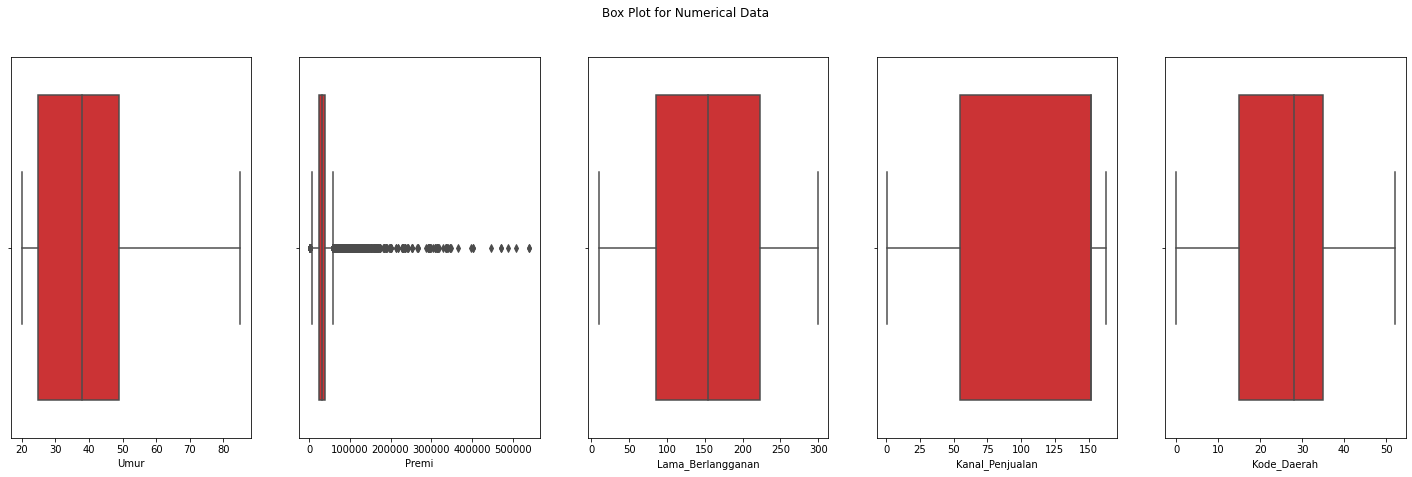

In [12]:
# Check Outlier in Data Train
check_outlier(df_train)

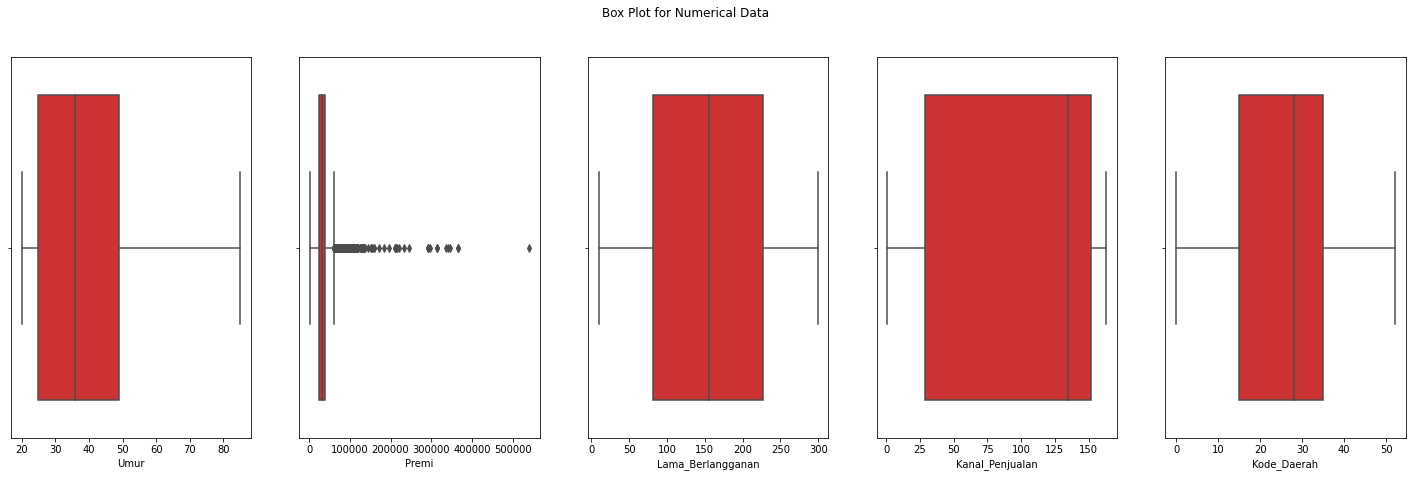

In [13]:
# Check Outlier in Data Test
check_outlier(df_test)

### **Drop Outlier With IQR Method**

In [14]:
def iqr(df):
  Q1 = df.Premi.quantile(0.25)
  Q3 = df.Premi.quantile(0.75)
  IQR = Q3 - Q1

  LB = Q1 - (IQR * 1.5)
  UB = Q3 + (IQR * 1.5)

  print("Batas Atas : ", UB)
  print("Batas Bawah : ", LB)

  df.loc[df['Premi'] > UB, "Premi"] = UB
  df.loc[df['Premi'] < LB, "Premi"] = LB

In [15]:
iqr(df_train)

Batas Atas :  59721.625
Batas Bawah :  4066.625


In [16]:
iqr(df_test)

Batas Atas :  62093.0
Batas Bawah :  1777.0


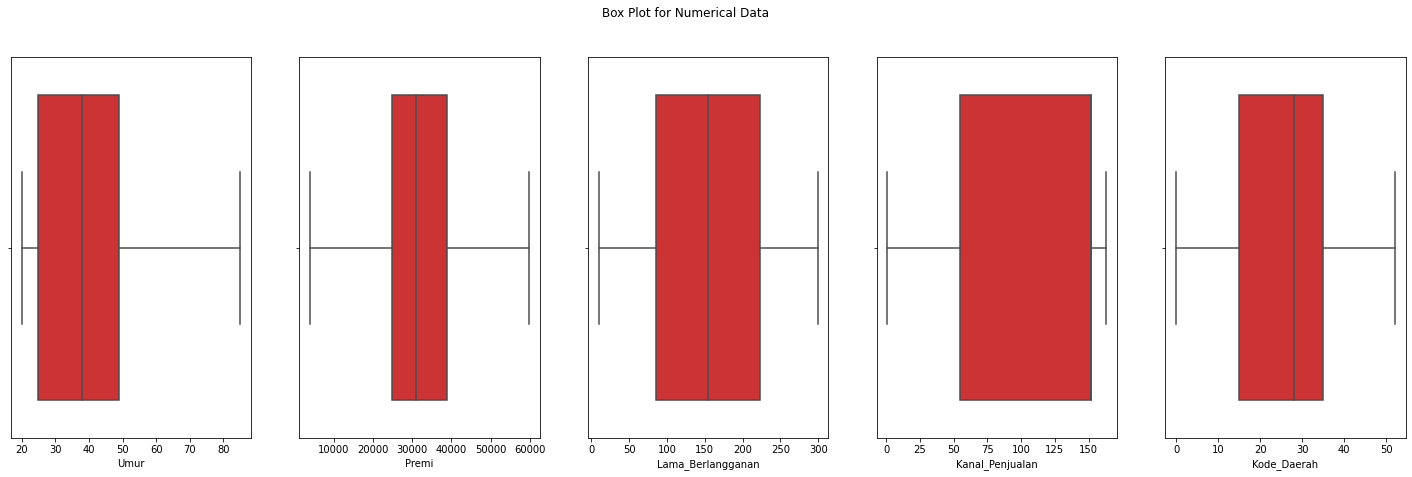

In [17]:
# Check Outlier in Data Train
check_outlier(df_train)

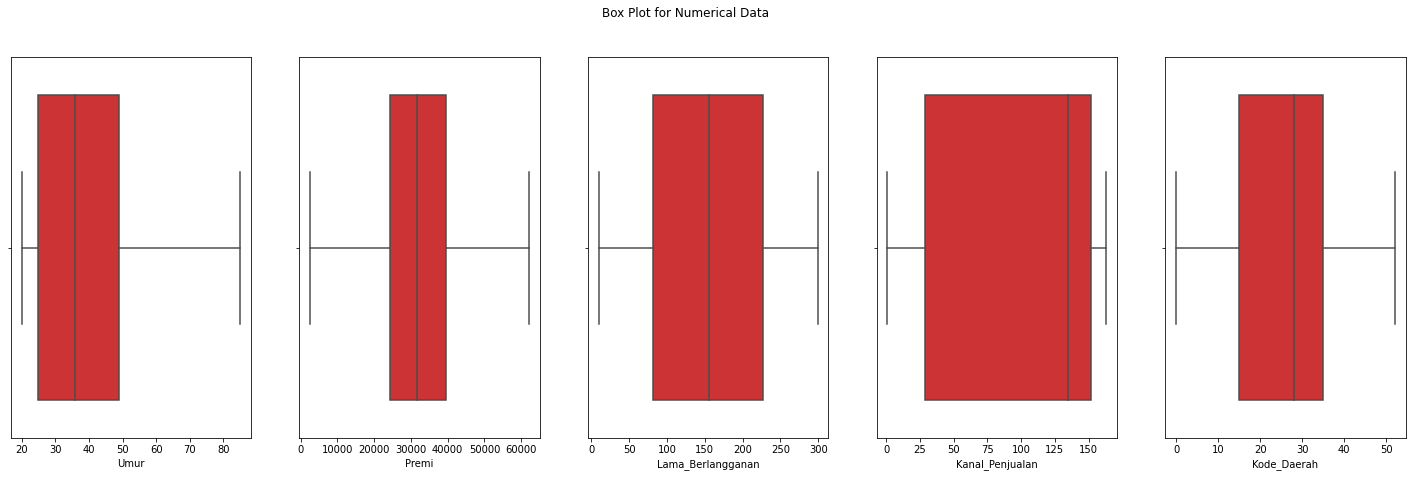

In [18]:
# Check Outlier in Data Test
check_outlier(df_test)

## **Normalization with MinMaxScaling Method**

In [19]:
# Normalization data train
numeric = ["Umur", "Premi", "Lama_Berlangganan", "Kanal_Penjualan", "Kode_Daerah"]

scaler = MinMaxScaler()

df_train[numeric] = scaler.fit_transform(df_train[numeric].values)
df_train.sample(5)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
35823,1.0,0.076923,1.0,0.538462,1.0,0.0,1.0,0.521074,0.932099,0.944637,0
39142,0.0,0.046154,1.0,0.865385,0.0,0.0,1.0,0.268015,0.925926,0.117647,0
30190,1.0,0.289956,1.0,0.538462,1.0,1.0,0.0,0.559831,0.370370,0.785467,0
243121,1.0,0.046154,1.0,0.961538,0.0,0.0,0.0,0.734909,0.932099,0.550173,0
97625,0.0,0.138462,1.0,0.538462,1.0,0.0,0.0,0.475813,0.932099,0.788927,0


In [20]:
# Normalization data test
scaler = MinMaxScaler()

df_test[numeric] = scaler.fit_transform(df_test[numeric].values)
df_test.sample(5)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
13076,0,0.030769,1,0.538462,1,0,0,0.900392,0.932099,0.754325,0
27898,0,0.461538,1,0.961538,1,1,0,0.606680,0.932099,0.813149,0
37953,0,0.076923,1,0.538462,1,0,0,0.713116,0.932099,0.522491,0
6741,0,0.061538,1,0.230769,1,0,0,0.565478,0.932099,0.380623,0
25453,1,0.015385,1,0.788462,1,0,1,0.735516,0.932099,0.605536,0


## **Saving Clean Dataset**

You don't need to run this cell. It's just saving our clean dataframe to csv or xlsx file

In [21]:
df_train.to_csv('../dataset/clean/kendaraan_train_clean.csv', index=False)
df_train.to_excel('../dataset/clean/kendaraan_train_clean.xlsx', index=False)
df_test.to_csv('../dataset/clean/kendaraan_test_clean.csv', index=False)
df_test.to_excel('../dataset/clean/kendaraan_test_clean.xlsx', index=False)

## **Check Feature Correlation**

C:\Users\WHAUZAN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\stats\stats.py:4812: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


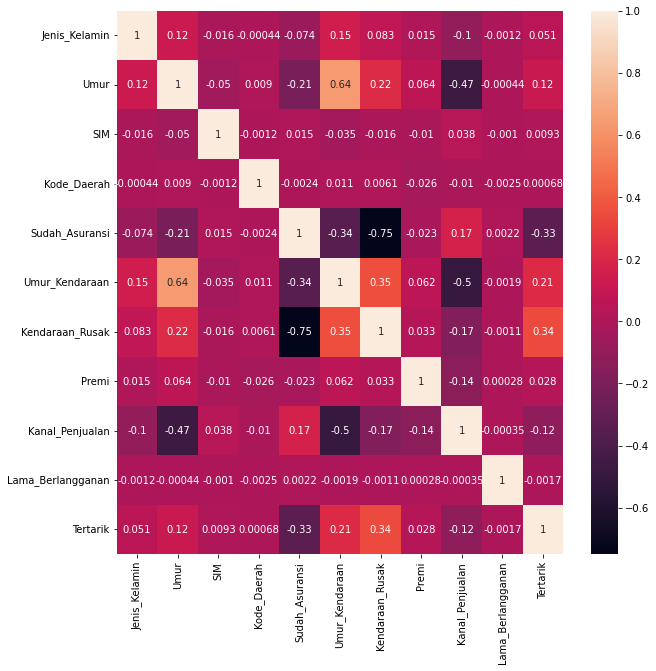

In [22]:
plt.figure(figsize=(10,10))
cor = df_train.corr(method="kendall")
sns.heatmap(cor, annot=True)
plt.show()

In [23]:
df_train.corr()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
Jenis_Kelamin,1.000000,0.135895,-0.015908,0.001447,-0.074361,0.148941,0.082514,0.004905,-0.105266,-0.001315,0.051296
Umur,0.135895,1.000000,-0.075204,0.041385,-0.237085,0.719408,0.249180,0.063690,-0.541335,0.000148,0.107102
SIM,-0.015908,-0.075204,1.000000,-0.003181,0.015245,-0.034405,-0.016428,-0.011308,0.040488,-0.001202,0.009349
Kode_Daerah,0.001447,0.041385,-0.003181,1.000000,-0.022560,0.040808,0.026297,-0.010509,-0.040708,-0.003469,0.009880
Sudah_Asuransi,-0.074361,-0.237085,0.015245,-0.022560,1.000000,-0.349270,-0.749669,0.005192,0.203278,0.002687,-0.326043
Umur_Kendaraan,0.148941,0.719408,-0.034405,0.040808,-0.349270,1.000000,0.364130,0.036576,-0.509245,-0.002230,0.213426
Kendaraan_Rusak,0.082514,0.249180,-0.016428,0.026297,-0.749669,0.364130,1.000000,0.008444,-0.207166,-0.001239,0.337950
Premi,0.004905,0.063690,-0.011308,-0.010509,0.005192,0.036576,0.008444,1.000000,-0.111699,-0.000208,0.023373
Kanal_Penjualan,-0.105266,-0.541335,0.040488,-0.040708,0.203278,-0.509245,-0.207166,-0.111699,1.000000,-0.000184,-0.135762
Lama_Berlangganan,-0.001315,0.000148,-0.001202,-0.003469,0.002687,-0.002230,-0.001239,-0.000208,-0.000184,1.000000,-0.002168


# **Modelling**

## **Feature Selection**

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
import scikitplot as skplt

import warnings
warnings.filterwarnings('ignore')

0    250661
1     35001
Name: Tertarik, dtype: int64


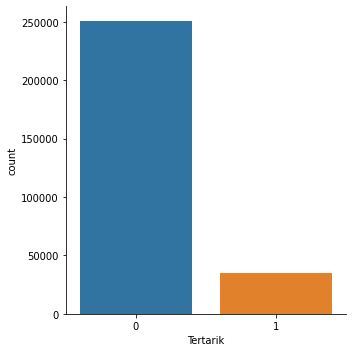

In [25]:
# Mengecek keseimbangan target variable
print(df_train['Tertarik'].value_counts())
sns.catplot(x='Tertarik', data=df_train, kind='count')

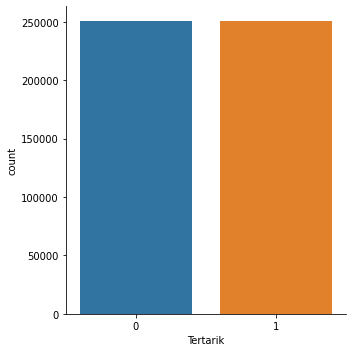

In [27]:
x_attr = ["Umur", "Sudah_Asuransi"]
y_attr = ["Tertarik"]
x_data = df_train[x_attr]
y_data = df_train[y_attr]

# Melakukan Oversampling untuk menyetarakan kelas minoritas (1)
smt = SMOTE(random_state=42, k_neighbors=5)
x_train, y_train = smt.fit_resample(x_data, y_data)

sns.catplot(x='Tertarik', data=pd.DataFrame(y_train), kind='count')

In [30]:
# Divide into train data and validation data(70:30) from data train
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.3)

print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_val.shape}')
print('---------------------------------')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_val.shape}')

x_train shape: (199963, 2)
x_test shape: (85699, 2)
---------------------------------
y_train shape: (199963, 1)
y_test shape: (85699, 1)


## **Prepare Model**

In [40]:
classifier = [
    DecisionTreeClassifier(class_weight='balanced'),
    GaussianNB(),
    RandomForestClassifier(class_weight='balanced', n_jobs=-1),
    KNeighborsClassifier(n_neighbors=5, metric='euclidean')
]

name = [
    'Decision Tree',
    'Naive Bayes',
    'Random Forest',
    'K-Nearest Neighbours'
]

## **Train the Model**

In [41]:
for models, i in zip(classifier, name):
    models.fit(x_train, y_train)

In [42]:
def report(model, title, x_test, y_test):
    result = model.predict(x_test)
    conf_matrix = confusion_matrix(y_test, result)

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

    sns.heatmap(conf_matrix, annot=True, xticklabels=[0, 1], yticklabels=[0, 1], cmap='flare', fmt='d', ax=axes[0])
    skplt.metrics.plot_roc(y_test, model.predict_proba(x_test), ax=axes[1])

    axes[0].set_ylabel('Actual')
    axes[0].set_xlabel('Predicted')
    axes[0].set_title(f'Confusion matrix {title}', pad=16)

    plt.show()

    f1 = round(f1_score(y_test, result, average='weighted'), 3)
    recall = round(recall_score(y_test, result), 3)
    precision = round(precision_score(y_test, result), 3)
    roc = round(roc_auc_score(y_test, result), 3)
    accuracy = round(accuracy_score(y_test, result), 3)

    print("F1-Score \t:", f1)
    print("Recall \t\t:", recall)
    print("Precision \t:", precision)
    print("ROC-AUC \t:", roc)
    print("Accuracy \t:", accuracy, end="\n\n")

    return title, f1, recall, precision, roc, accuracy

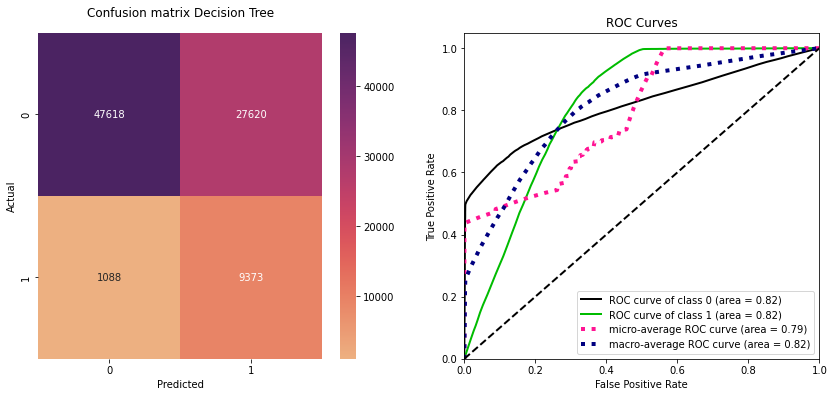

F1-Score 	: 0.723
Recall 		: 0.896
Precision 	: 0.253
ROC-AUC 	: 0.764
Accuracy 	: 0.665



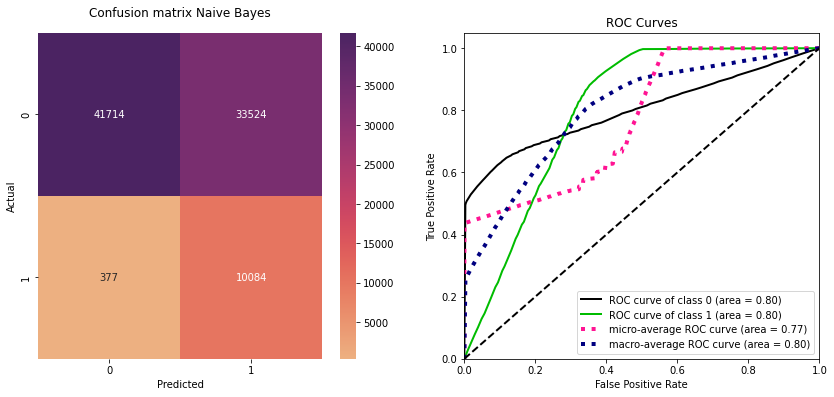

F1-Score 	: 0.67
Recall 		: 0.964
Precision 	: 0.231
ROC-AUC 	: 0.759
Accuracy 	: 0.604



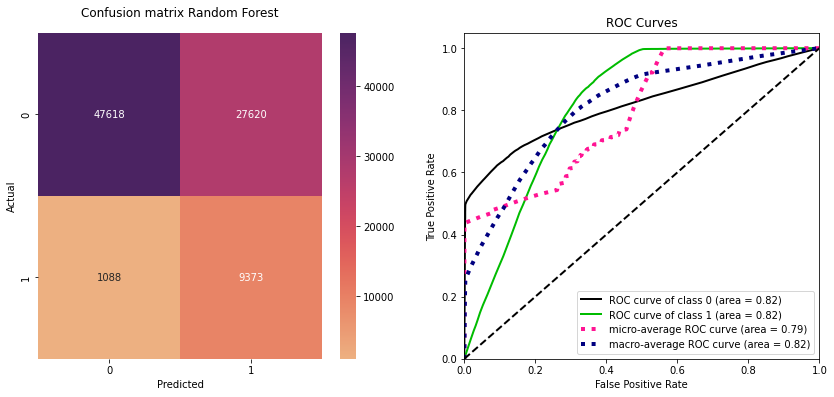

F1-Score 	: 0.723
Recall 		: 0.896
Precision 	: 0.253
ROC-AUC 	: 0.764
Accuracy 	: 0.665



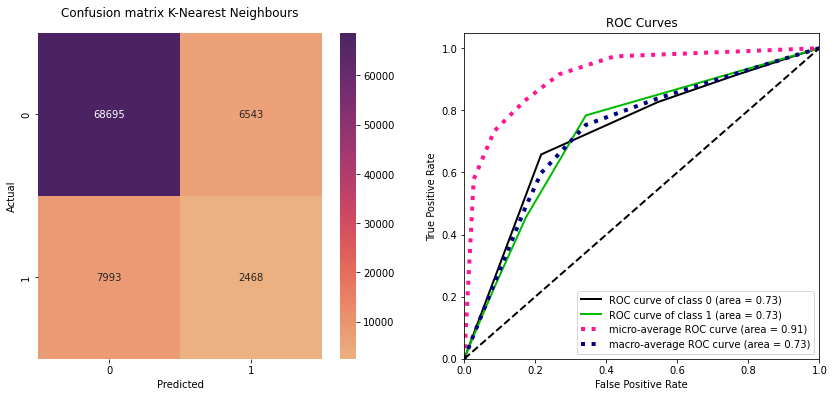

F1-Score 	: 0.825
Recall 		: 0.236
Precision 	: 0.274
ROC-AUC 	: 0.574
Accuracy 	: 0.83



In [43]:
metrics_report = []

for models, i in zip(classifier, name):
    title, f1, recall, precision, roc, accuracy = report(models, i, x_val, y_val)
    metrics_report.append([title, f1, recall, precision, roc, accuracy])

In [44]:
metrics_report = pd.DataFrame(metrics_report, columns=['Model', 'F1-Score', 'Recall', 'Precision', 'ROC-AUC', 'Accuracy'])
metrics_report.sort_values(by=['ROC-AUC'], ascending=False)

,Model,F1-Score,Recall,Precision,ROC-AUC,Accuracy
0,Decision Tree,0.723,0.896,0.253,0.764,0.665
2,Random Forest,0.723,0.896,0.253,0.764,0.665
1,Naive Bayes,0.670,0.964,0.231,0.759,0.604
3,K-Nearest Neighbours,0.825,0.236,0.274,0.574,0.830


# **Predict and Evaluate the Data Test**

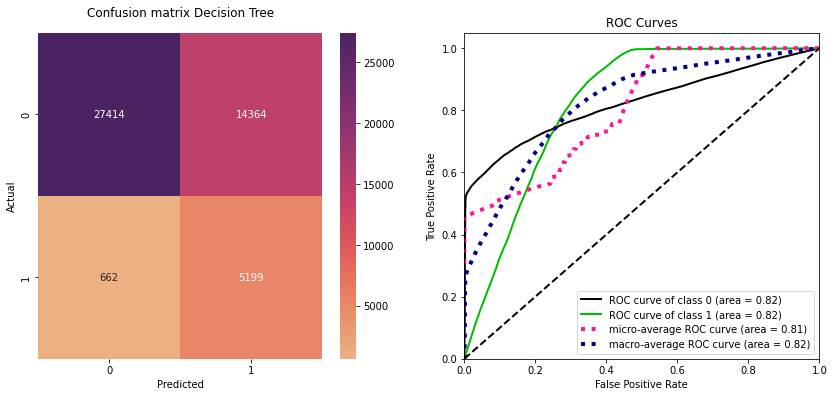

F1-Score 	: 0.739
Recall 		: 0.887
Precision 	: 0.266
ROC-AUC 	: 0.772
Accuracy 	: 0.685



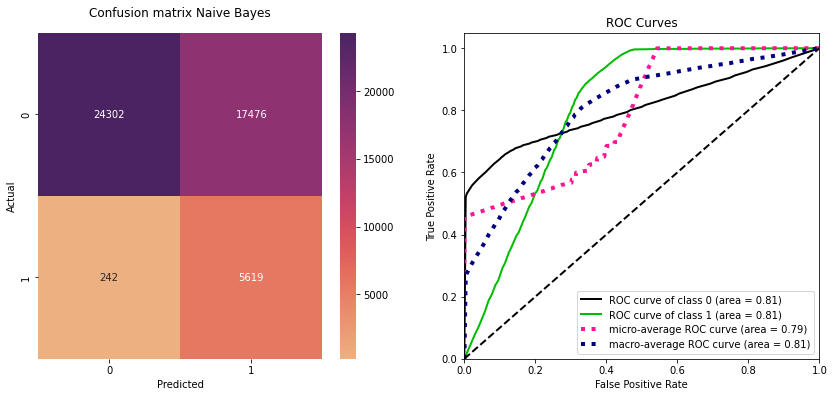

F1-Score 	: 0.69
Recall 		: 0.959
Precision 	: 0.243
ROC-AUC 	: 0.77
Accuracy 	: 0.628



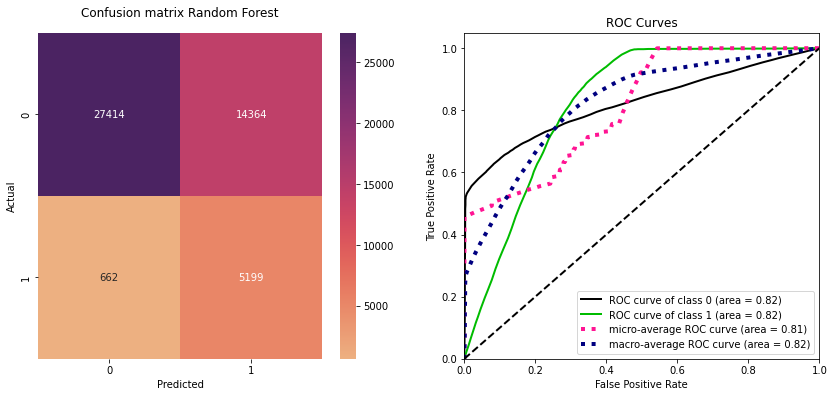

F1-Score 	: 0.739
Recall 		: 0.887
Precision 	: 0.266
ROC-AUC 	: 0.772
Accuracy 	: 0.685



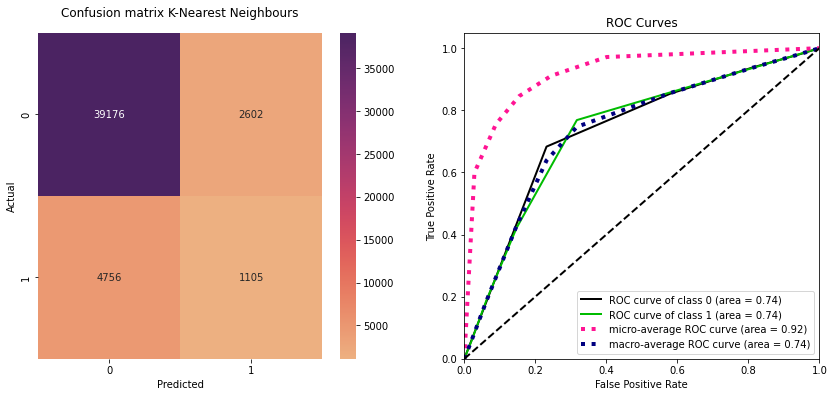

F1-Score 	: 0.83
Recall 		: 0.189
Precision 	: 0.298
ROC-AUC 	: 0.563
Accuracy 	: 0.846



In [36]:
x_test = df_test[x_attr]
y_test = df_test[y_attr]

metrics_report_test = []

for models, i in zip(classifier, name):
    title, f1, recall, precision, roc, accuracy = report(models, i, x_test, y_test)
    metrics_report_test.append([title, f1, recall, precision, roc, accuracy])

## **Balance Prediction Between True Positive and True Negative**

In [38]:
metrics_report = pd.DataFrame(metrics_report_test, columns=['Model', 'F1-Score', 'Recall', 'Precision', 'ROC-AUC', 'Accuracy'])
metrics_report.sort_values(by=['ROC-AUC'], ascending=False)

,Model,F1-Score,Recall,Precision,ROC-AUC,Accuracy
0,Decision Tree,0.739,0.887,0.266,0.772,0.685
2,Random Forest,0.739,0.887,0.266,0.772,0.685
1,Naive Bayes,0.690,0.959,0.243,0.770,0.628
3,K-Nearest Neighbours,0.830,0.189,0.298,0.563,0.846


## **Prediction True Positive**

In [45]:
metrics_report_test = pd.DataFrame(metrics_report_test, columns=['Model', 'F1-Score', 'Recall', 'Precision', 'ROC-AUC', 'Accuracy'])
metrics_report_test.sort_values(by=['Recall'], ascending=False)

,Model,F1-Score,Recall,Precision,ROC-AUC,Accuracy
1,Naive Bayes,0.690,0.959,0.243,0.770,0.628
0,Decision Tree,0.739,0.887,0.266,0.772,0.685
2,Random Forest,0.739,0.887,0.266,0.772,0.685
3,K-Nearest Neighbours,0.830,0.189,0.298,0.563,0.846
